In [ ]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.linalg import inv
import os
import scipy
from scipy import stats
from scipy.stats import skew,kurtosis
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import legend
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import t , f
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep
from scipy.stats import ttest_ind

In [ ]:
# Re-import libraries due to kernel reset
import pandas as pd
# Step 2: Load Dataset.
df=pd.read_csv('hotel_bookings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Check the how many null values in each columns
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Check shape and a quick summary
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

((119390, 32), None)

In [ ]:
# Step 1: Data Cleaning and Preprocessing
# Fill missing values with appropriate replacements
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Convert categorical variables
categorical_cols = ['meal', 'country', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
df[categorical_cols] = df[categorical_cols].astype('category')

In [ ]:
# Create derived fields
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [ ]:
# Convert reservation_status_date to datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str), errors='coerce') # Convert arrival date to datetime

In [ ]:
# Parse and standardize date columns
arrival_date = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                              df['arrival_date_month'] + '-' +
                              df['arrival_date_day_of_month'].astype(str), errors='coerce')
df['arrival_date'] = arrival_date

In [ ]:
# Handle outliers (cap extremely high ADR and lead_time)
df = df[df['adr'] < df['adr'].quantile(0.99)]
df = df[df['lead_time'] < df['lead_time'].quantile(0.99)]

In [ ]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85653 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85653 non-null  object        
 1   is_canceled                     85653 non-null  int64         
 2   lead_time                       85653 non-null  int64         
 3   arrival_date_year               85653 non-null  int64         
 4   arrival_date_month              85653 non-null  object        
 5   arrival_date_week_number        85653 non-null  int64         
 6   arrival_date_day_of_month       85653 non-null  int64         
 7   stays_in_weekend_nights         85653 non-null  int64         
 8   stays_in_week_nights            85653 non-null  int64         
 9   adults                          85653 non-null  int64         
 10  children                        85653 non-null  float64       
 11  babies

((85653, 35), None)

# 2. Exploratory Data Analysis

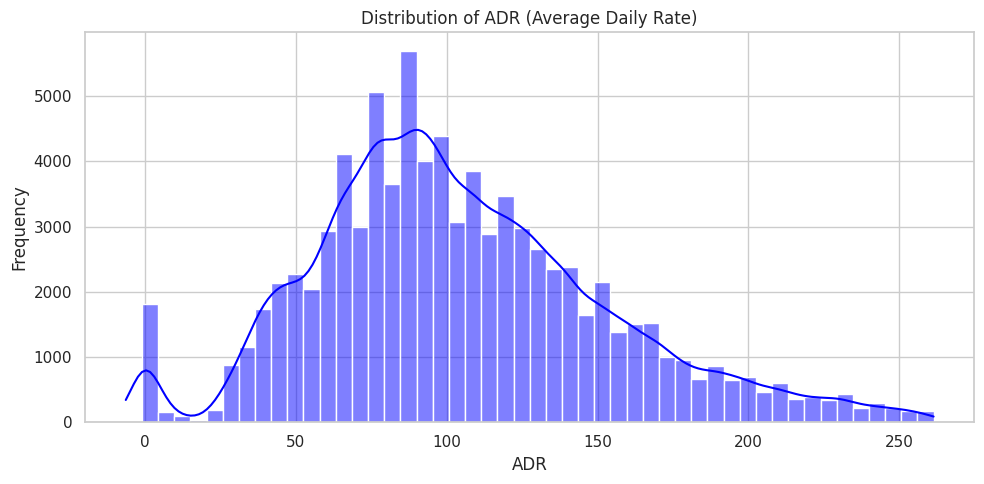

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic parameters for seaborn
sns.set(style="whitegrid")
# ---------- Univariate Analysis ----------

# 1. Distribution of ADR (Average Daily Rate)
plt.figure(figsize=(10, 5))
sns.histplot(df['adr'], bins=50, kde=True, color='blue')
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

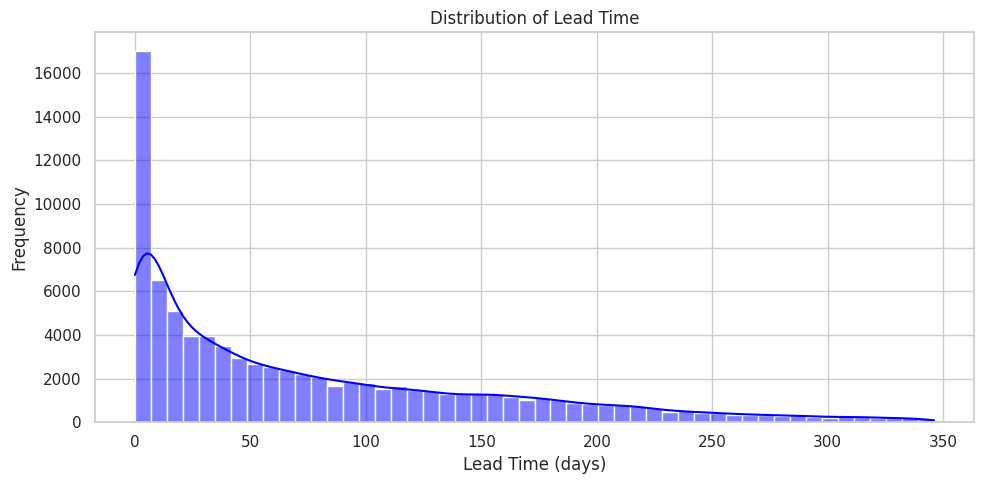

In [ ]:
# 2. Lead time distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

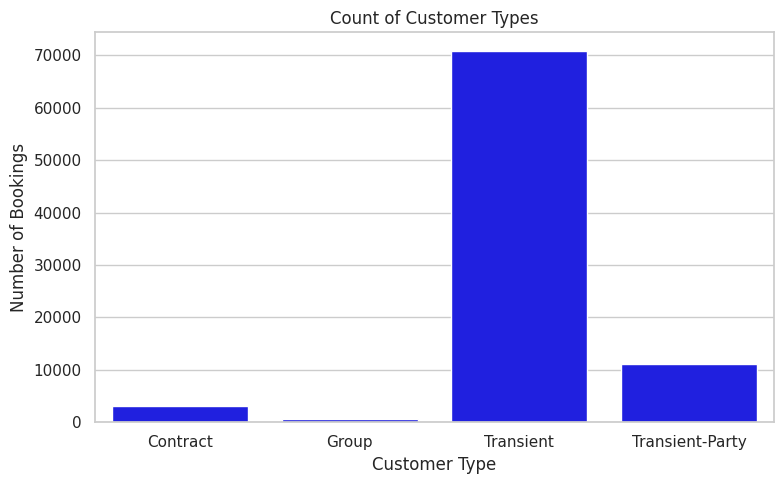

In [ ]:
# 3. Customer type count
plt.figure(figsize=(8, 5))
sns.countplot(x='customer_type', data=df, color='blue')
plt.title('Count of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

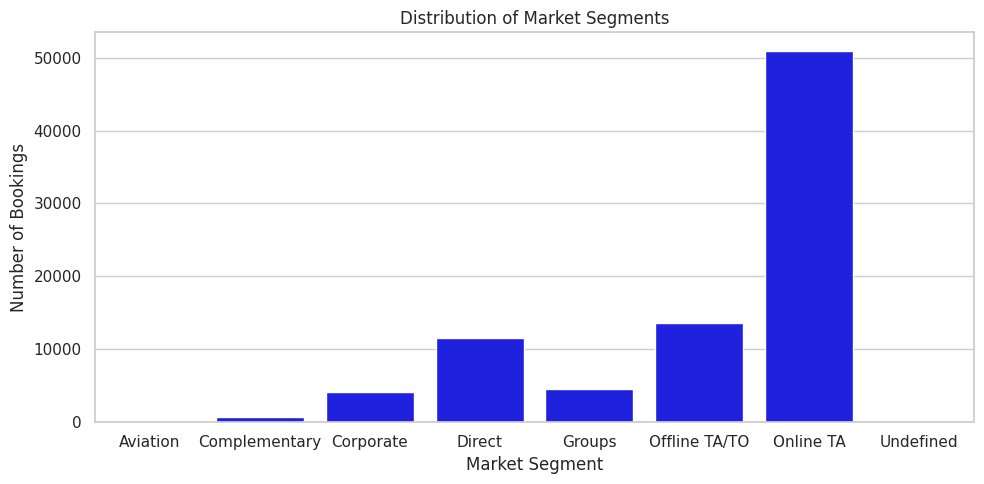

In [ ]:
# 4. Market segment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='market_segment', data=df, color='blue')
plt.title('Distribution of Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

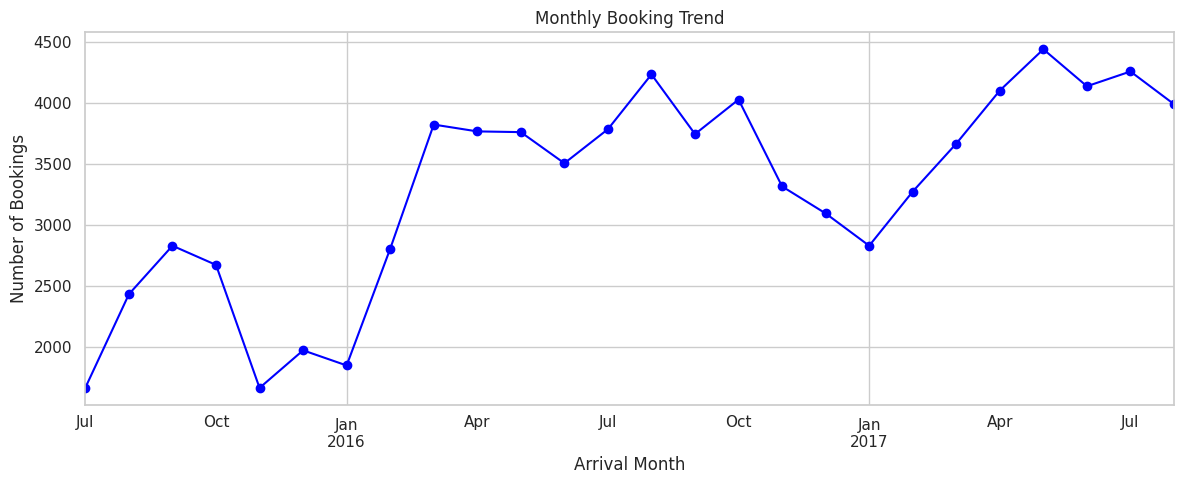

In [ ]:
# 5. Booking trend over time (monthly)
monthly_bookings = df['arrival_date'].dt.to_period("M").value_counts().sort_index()
monthly_bookings.plot(kind='line', figsize=(12, 5), marker='o', color='blue')
plt.title('Monthly Booking Trend')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Bivariate Analysis

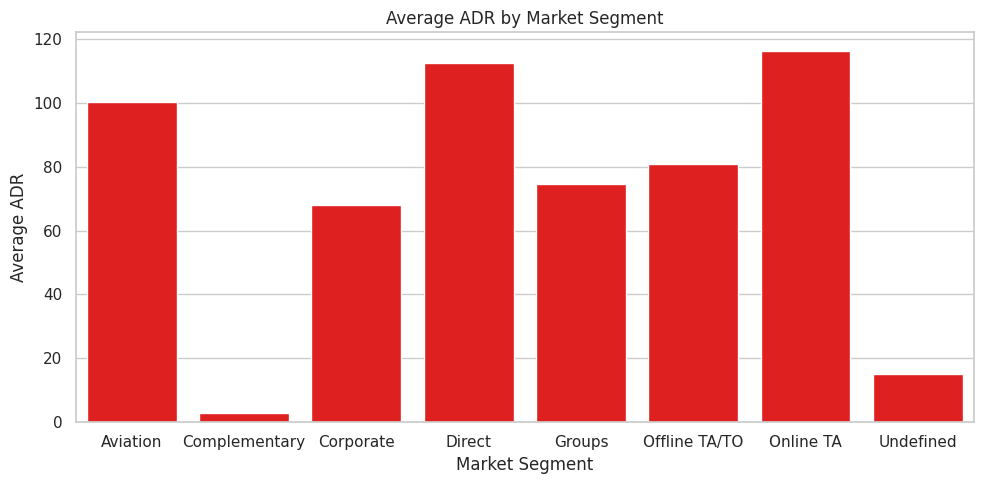

In [ ]:
# 7. Average ADR by Market Segment
adr_by_segment = df.groupby('market_segment', observed=True)['adr'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=adr_by_segment.index, y=adr_by_segment.values,color='red')
plt.title('Average ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average ADR')
plt.tight_layout()
plt.show()

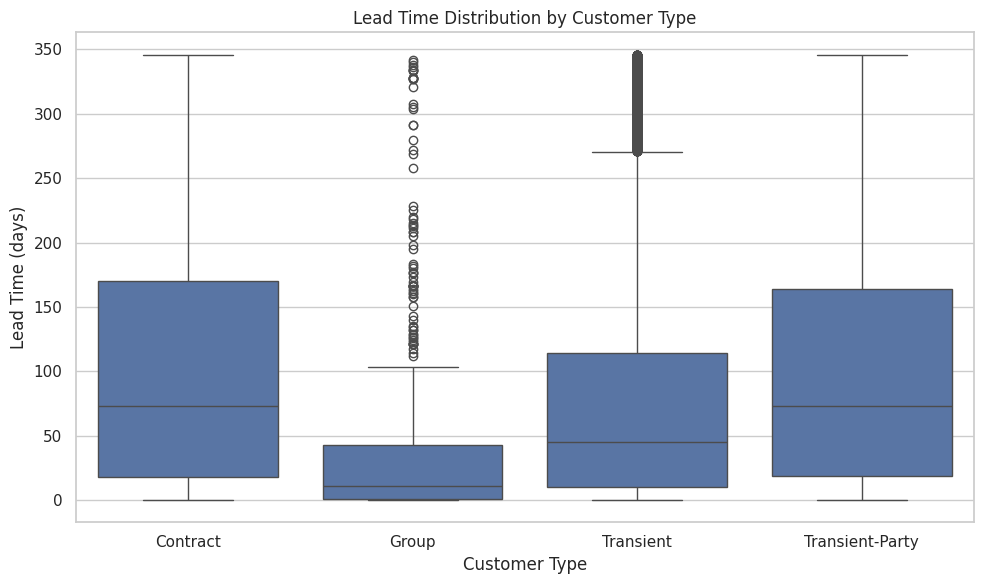

In [ ]:
# 8. Lead time distribution across customer types
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (days)')
plt.tight_layout()
plt.show()

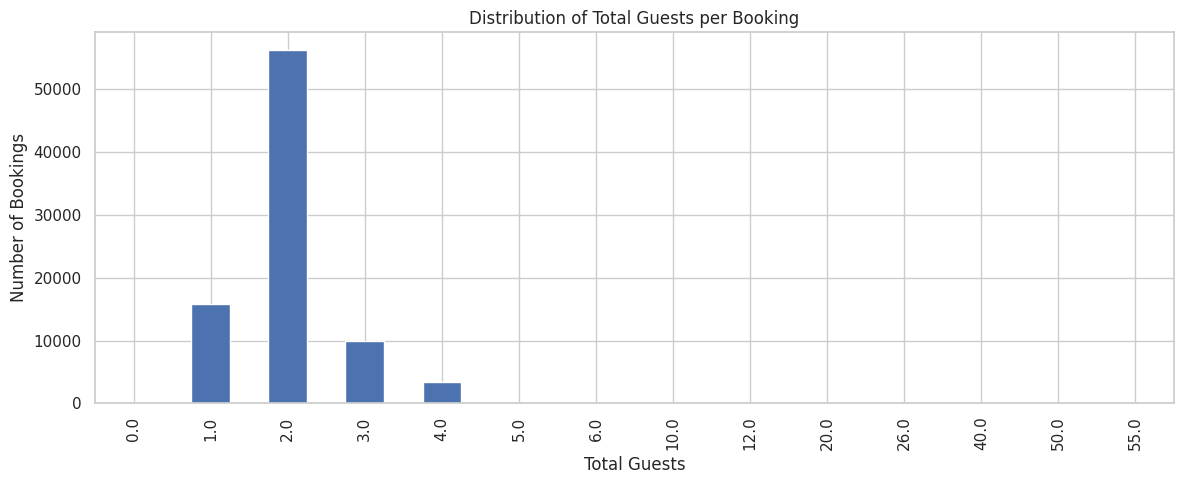

In [ ]:
# 9.Total guests per booking
df['total_guests'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title('Distribution of Total Guests per Booking')
plt.xlabel('Total Guests')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

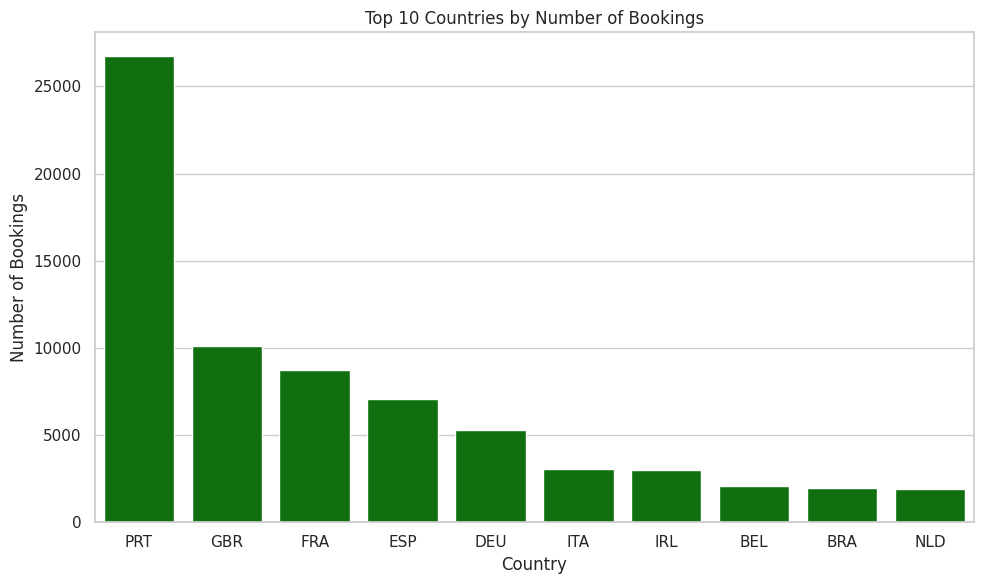

In [ ]:
# Get top 10 countries
top_countries = df['country'].value_counts().head(10)

# Filter the DataFrame to only include rows from the top 10 countries
top_df = df[df['country'].isin(top_countries.index)]

# Plot with correct data
plt.figure(figsize=(10, 6))
sns.countplot(data=top_df, x='country', order=top_countries.index, color='green')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Multi variate

<ipython-input-67-31db9d194e4d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='market_segment', y='adr', hue='customer_type', estimator='mean',ci=None)


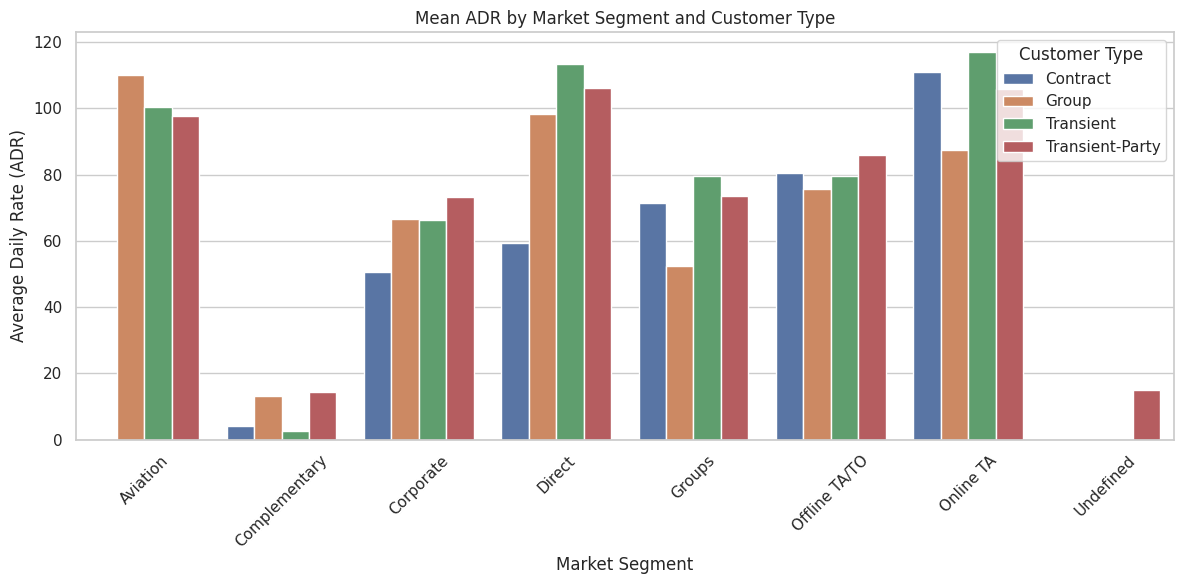

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='market_segment', y='adr', hue='customer_type', estimator='mean',ci=None)
plt.title("Mean ADR by Market Segment and Customer Type")
plt.xlabel("Market Segment")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend(title='Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Correlation Analysis

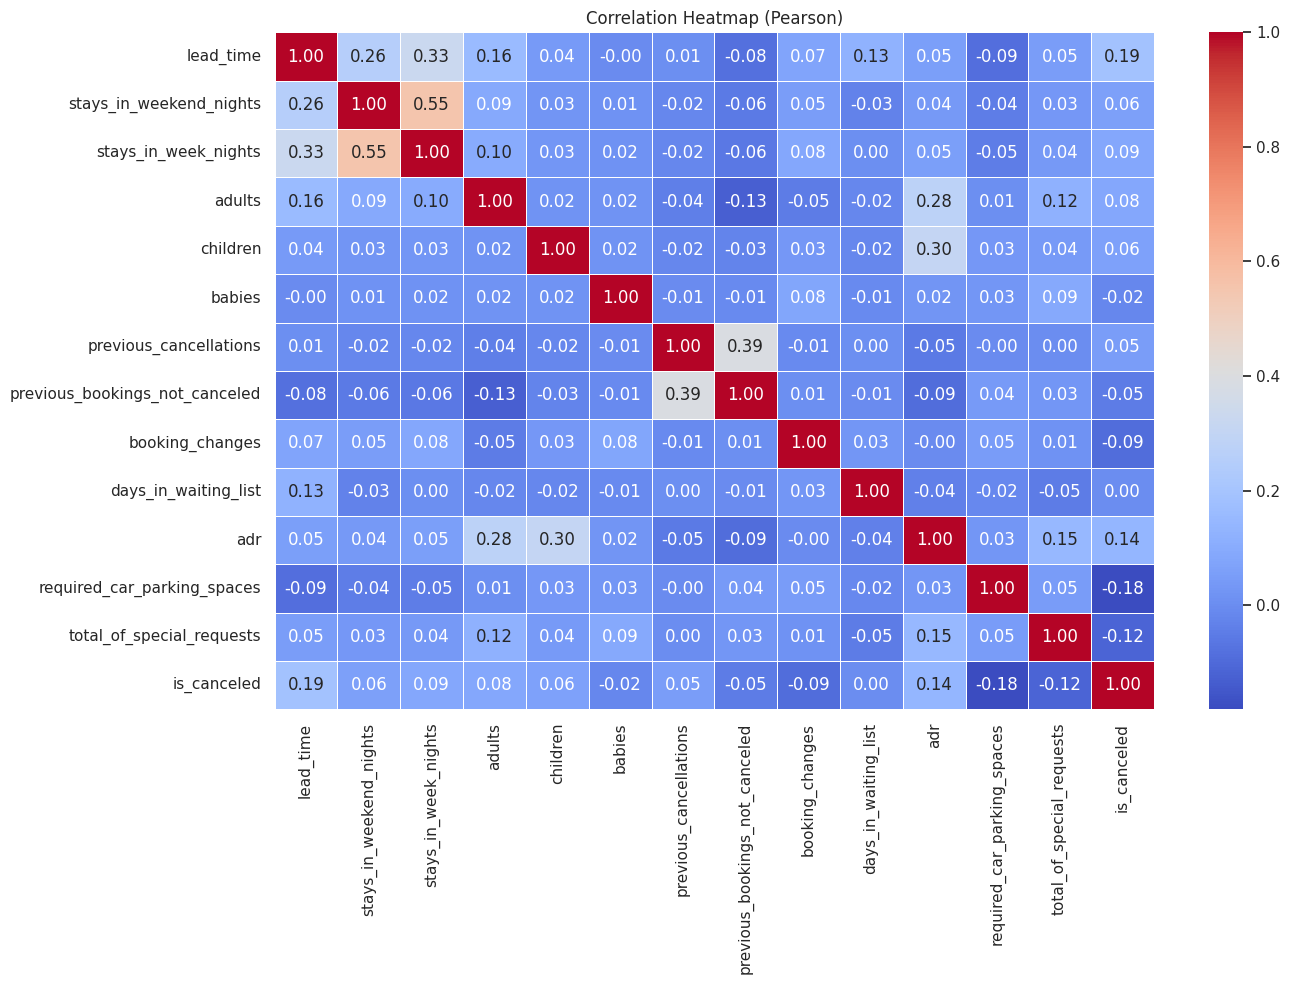

In [ ]:
# Step 3: Correlation Analysis (numerical features)
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adults', 'children', 'babies', 'previous_cancellations',
'previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr', 'required_car_parking_spaces','total_of_special_requests',
'is_canceled']

# Calculate Pearson correlation
correlation_matrix = df[numerical_features].corr(method='pearson')

# Heatmap visualization
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

# 4. Hypothesis Testing

In [ ]:
# H0: No difference in ADR between Online TA and Direct
online_ta_adr = df[df['distribution_channel'] == 'TA/TO']['adr']
direct_adr = df[df['distribution_channel'] == 'Direct']['adr']

t_stat, p_value = ttest_ind(online_ta_adr, direct_adr, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}\nP-Value: {p_value:.4f}")

T-Statistic: 3.6999
P-Value: 0.0002


In [ ]:
# H0: Room upgrades are independent of lead time
from scipy.stats import chi2_contingency
import pandas as pd

# Ensure string type comparison to avoid category mismatch error
df['room_upgrade'] = df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)

# Bucket lead_time into categories
bins = [0, 30, 60, 90, 120, df['lead_time'].max()]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']
df['lead_time_bucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, include_lowest=True)

# Create contingency table
contingency_table = pd.crosstab(df['room_upgrade'], df['lead_time_bucket'])

# Run Chi-Square test
chi2_room_upgrade_result = chi2_contingency(contingency_table)

# Output
print("Chi2 Statistic:", round(chi2_room_upgrade_result[0], 3))
print("p-value:", round(chi2_room_upgrade_result[1], 4))

# Interpretation
if chi2_room_upgrade_result[1] < 0.05:
    print("Reject H0: Room upgrades are dependent on lead time.")
else:
    print("Fail to Reject H0: No significant relationship between room upgrades and lead time.")


Chi2 Statistic: 1661.606
p-value: 0.0
Reject H0: Room upgrades are dependent on lead time.


In [ ]:
# H0: Average stay duration does not differ between customer types
from scipy.stats import f_oneway

# Calculate stay duration
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Separate stay durations by customer type
groups = [group['stay_duration'].values for name, group in df.groupby('customer_type')]

# Run one-way ANOVA
anova_result = f_oneway(*groups)

# Print results
print("F-statistic:", round(anova_result.statistic, 3))
print("p-value:", round(anova_result.pvalue, 4))



F-statistic: 803.903
p-value: 0.0


<ipython-input-71-07e6978ea575>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['stay_duration'].values for name, group in df.groupby('customer_type')]


## Key Bussiness Question

1) ●	What influences ADR the most?
- Approach:

  - Correlation analysis between ADR and numeric features (lead time, length of stay, booking changes, etc.)

  - Compare ADR across categorical features (customer type, market segment, country) using boxplots or group means

  - Possibly build a regression model (linear or tree-based) to see feature importance


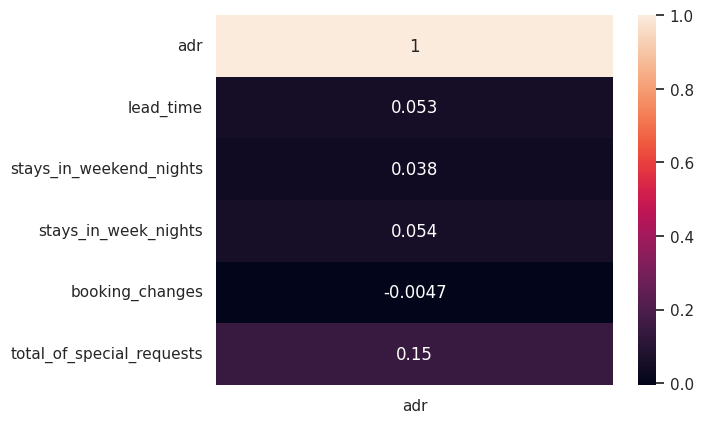

In [ ]:
# Correlation heatmap for numeric variables vs ADR
numeric_cols = ['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes', 'total_of_special_requests']
corr = df[numeric_cols].corr()
sns.heatmap(corr[['adr']], annot=True)
plt.show()


2) Do guests who book earlier tend to request more changes?
- Approach:

  - Plot scatter or grouped means of booking_changes vs lead_time

  - Calculate correlation between lead_time and booking_changes

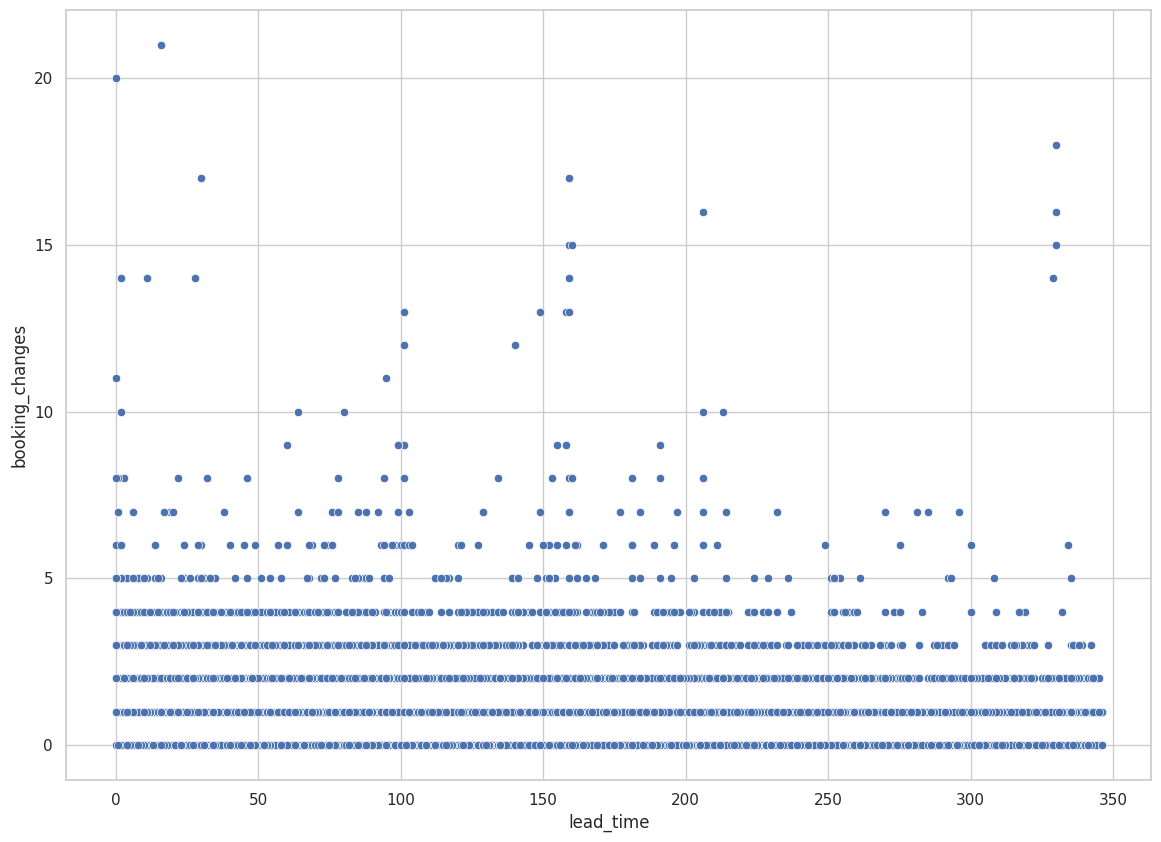

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='lead_time', y='booking_changes', data=df)
plt.show()

3) Are there pricing or booking differences across countries?
- Approach:

  - Compare ADR distribution per country

  - Compare booking lead times per country

  - Count bookings by country

In [ ]:
country_stats = df.groupby('country').agg({
    'adr': ['mean', 'median'],
    'lead_time': 'mean',
    'reservation_status_date': 'count'
}).reset_index()

print(country_stats)

    country         adr            lead_time reservation_status_date
                   mean   median        mean                   count
0       ABW  128.340000  128.340  126.000000                       2
1       AGO  115.558843  103.670   23.899110                     337
2       AIA         NaN      NaN         NaN                       0
3       ALB   85.203636   81.900   93.272727                      11
4       AND  177.428333  204.285   48.666667                       6
..      ...         ...      ...         ...                     ...
173     VGB  100.500000  100.500  109.000000                       1
174     VNM  123.267500  114.095   84.125000                       8
175     ZAF  108.442763   96.335   64.500000                      76
176     ZMB  101.885000  101.885   68.500000                       2
177     ZWE   85.307500   94.565   83.000000                       4

[178 rows x 5 columns]


<ipython-input-74-2ff6ac9f4fca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_stats = df.groupby('country').agg({


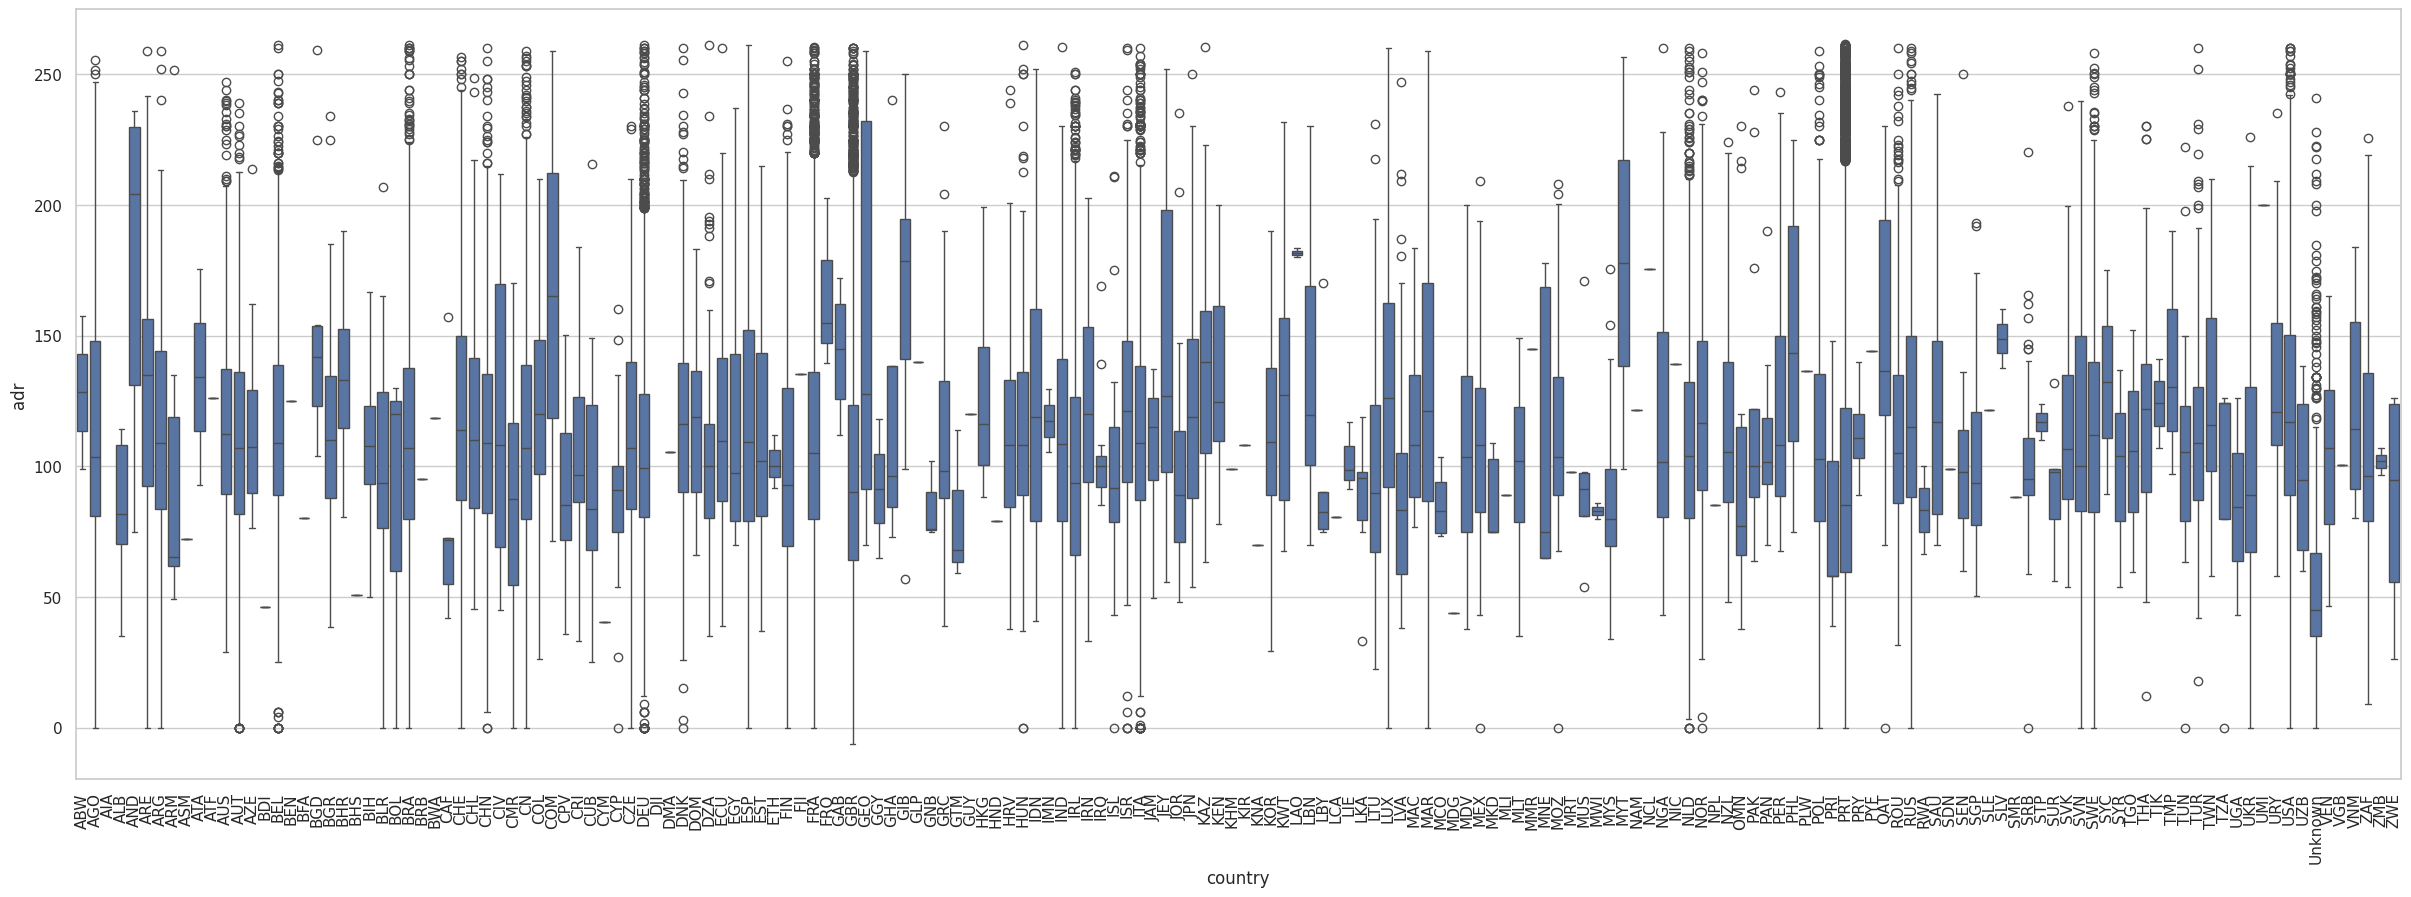

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='country', y='adr', data=df)
plt.xticks(rotation=90)
plt.show()

4) Is there a pattern in room upgrades or reassignment?
- Approach:

  - Create a flag where assigned_room_type != reserved_room_type

  - Analyze frequency and patterns by customer type or market segment

In [ ]:
# 4. Is there a pattern in room upgrades or reassignment?
df['room_change'] = df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)
room_change_rate = df['room_change'].mean()
print(f"Room change rate: {room_change_rate:.2%}")


Room change rate: 15.10%


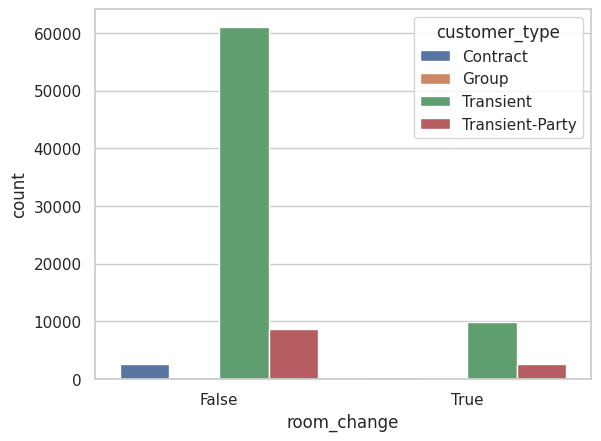

In [ ]:
sns.countplot(x='room_change', hue='customer_type', data=df)
plt.show()

5) Are reserved room types consistently matched with assigned room types?
- Approach:

  - Similar to above, check % matches/mismatches

In [ ]:
room_match_rate = (df['reserved_room_type'].astype(str) == df['assigned_room_type'].astype(str)).mean()
print(f"Room match rate: {room_match_rate:.2%}")

Room match rate: 84.90%


6) ●	What are the most common guest demographics (e.g., group size, nationality)?
- Approach:

  - Frequency counts of nationality

  - Distribution of group sizes (adults + children + babies)

In [ ]:
df['group_size'] = df['adults'] + df['children'] + df['babies']

top_countries = df['country'].value_counts().head(10)
print(top_countries)

country
PRT    26765
GBR    10094
FRA     8757
ESP     7058
DEU     5303
ITA     3047
IRL     2995
BEL     2056
BRA     1980
NLD     1891
Name: count, dtype: int64


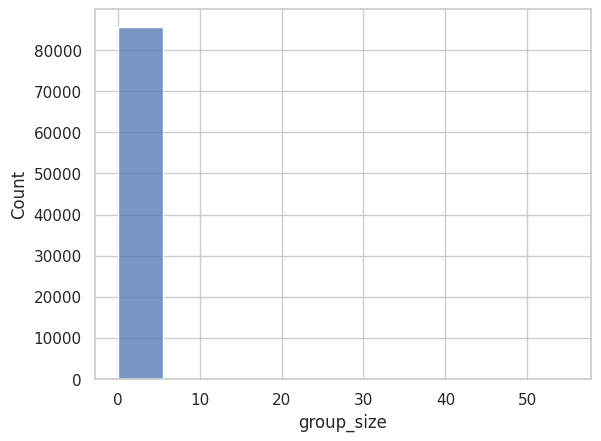

In [ ]:
sns.histplot(df['group_size'], bins=10)
plt.show()

7) Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?
- Approach:

  - Compare booking changes, lead time, ADR across guest types

In [ ]:
guest_patterns = df.groupby('customer_type', observed=True)[['lead_time', 'adr']].mean()
print(guest_patterns)

                  lead_time         adr
customer_type                          
Contract         102.366874   93.120804
Group             45.488636   83.238447
Transient         71.964618  108.033464
Transient-Party  100.891783   86.958788


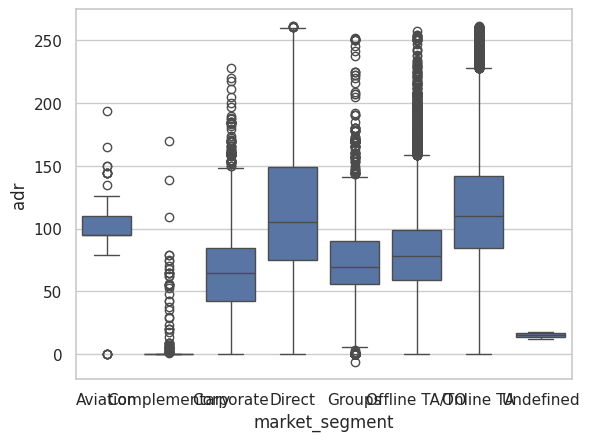

In [ ]:
sns.boxplot(x='market_segment', y='adr', data=df)
plt.show()

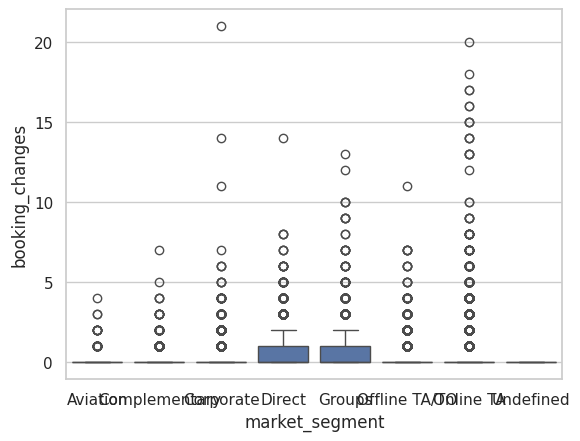

In [ ]:
sns.boxplot(x='market_segment', y='booking_changes', data=df)
plt.show()

8) How does booking lead time vary across customer types and countries?
- Approach:

  - Group by customer type and country, aggregate mean lead_time

In [ ]:
lead_time_stats = df.groupby(['customer_type', 'country'])['lead_time'].mean().unstack()
print(lead_time_stats)

country            ABW        AGO  AIA         ALB        AND        ARE  \
customer_type                                                              
Contract           NaN   6.571429  NaN         NaN        NaN        NaN   
Group              NaN   1.000000  NaN         NaN        NaN        NaN   
Transient        126.0  24.912226  NaN   59.125000  48.666667  49.108696   
Transient-Party    NaN   6.555556  NaN  184.333333        NaN   6.000000   

country                 ARG   ARM   ASM   ATA  ...         URY        USA  \
customer_type                                  ...                          
Contract         102.500000   NaN   NaN   NaN  ...         NaN  40.277778   
Group              5.000000   NaN   NaN   NaN  ...         NaN  61.333333   
Transient         72.377246  60.0  89.0  20.5  ...  117.692308  64.588056   
Transient-Party   48.393939  33.0   NaN   NaN  ...   11.000000  98.975309   

country            UZB    Unknown        VEN    VGB         VNM         ZAF  \
c

<ipython-input-84-c8a14aa995ab>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_stats = df.groupby(['customer_type', 'country'])['lead_time'].mean().unstack()


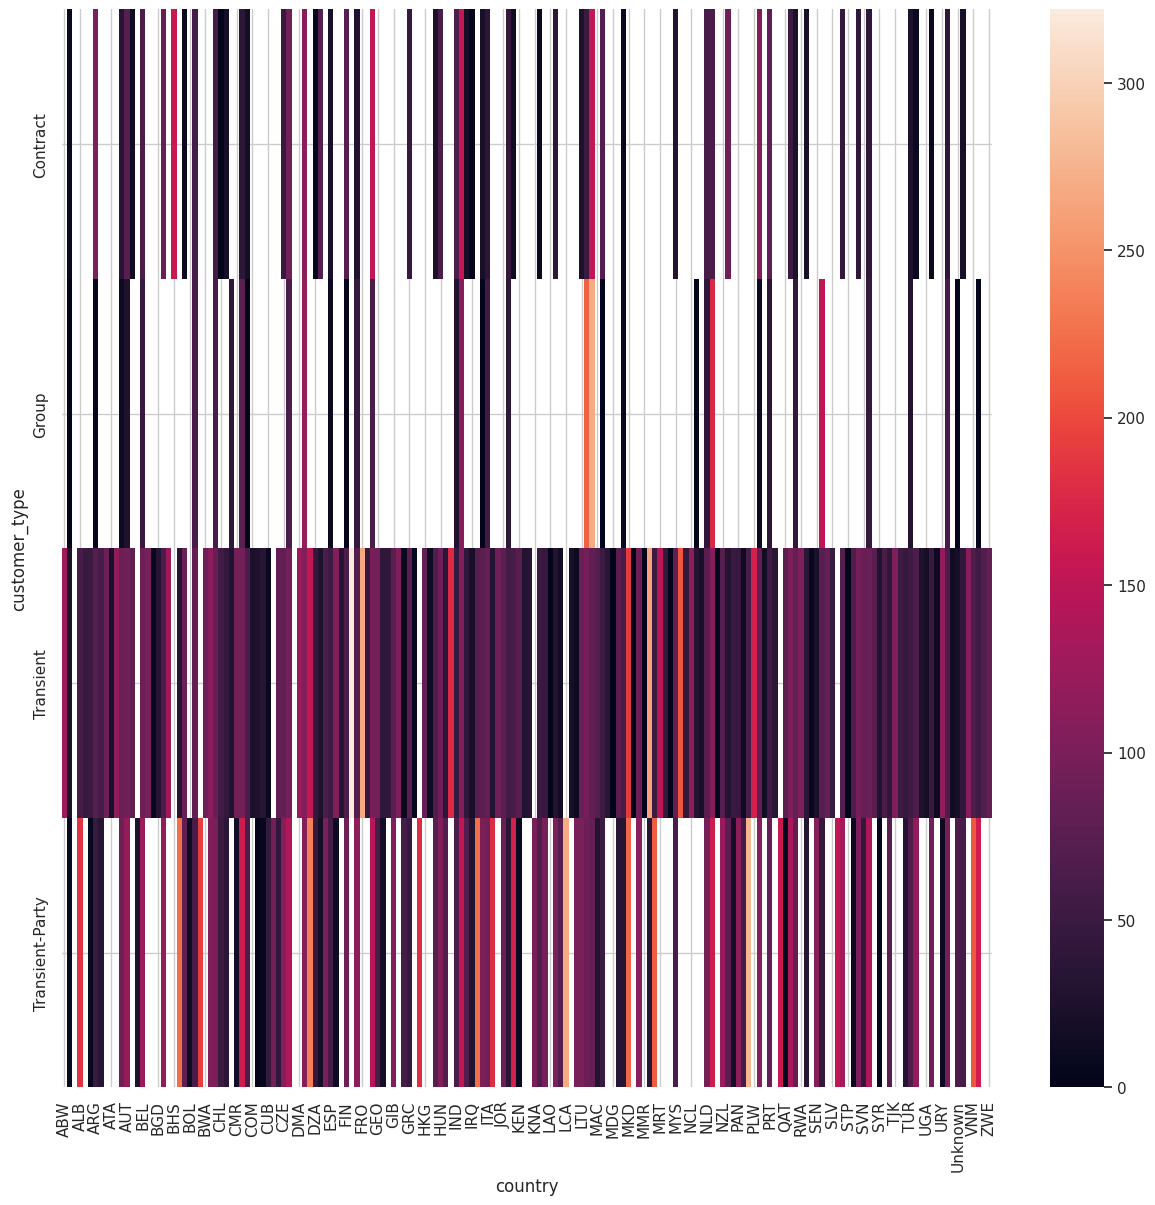

In [ ]:
plt.figure(figsize=(15, 14))
sns.heatmap(lead_time_stats)
plt.show()

9) ●	Are longer lead times associated with fewer booking changes or cancellations?
- Approach:

  - Correlation analysis and scatter plots

  - Analyze cancellations flag with respect to lead time

In [ ]:
# Q9. Are longer lead times associated with fewer booking changes or cancellations?
lead_corr_changes = df['lead_time'].corr(df['booking_changes'])
lead_corr_cancellations = df['lead_time'].corr(df['is_canceled'])

print(f"Correlation with booking changes: {lead_corr_changes:.2f}")
print(f"Correlation with cancellations: {lead_corr_cancellations:.2f}")

Correlation with booking changes: 0.07
Correlation with cancellations: 0.19


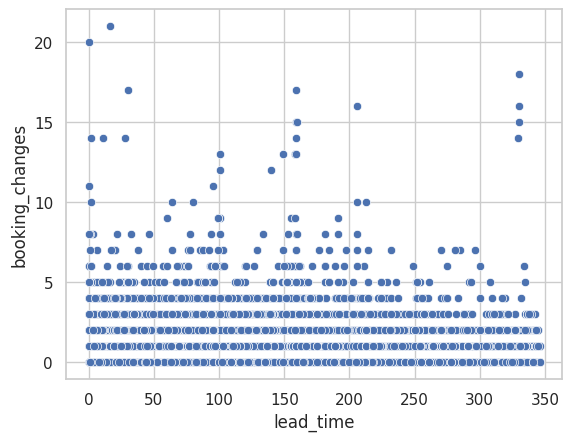

In [ ]:
sns.scatterplot(x='lead_time', y='booking_changes', data=df)
plt.show()

10) What is the typical duration of stay, and how does it vary by customer type or segment?
- Approach:

  - Calculate total stay = stays_in_weekend_nights + stays_in_week_nights

  - Plot distribution by customer type or market segment

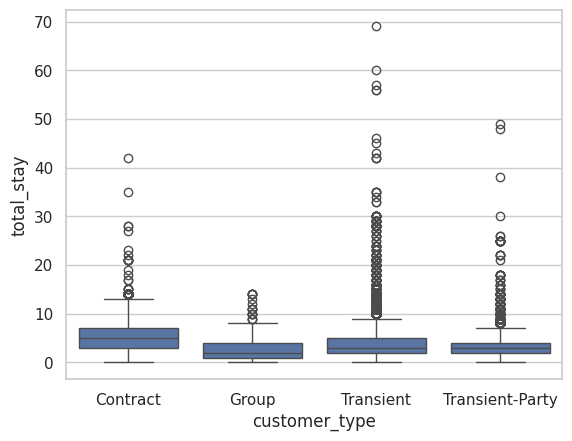

In [ ]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
sns.boxplot(x='customer_type', y='total_stay', data=df)
plt.show()

11) How often are guests upgraded or reassigned to a different room type?
- Approach:

  - Same as #4 & #5, but also see % with room_mismatch == True

In [ ]:
# Q11. How often are guests upgraded or reassigned to a different room type?
df['room_change'] = df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)
upgrade_rate = df['room_change'].mean()
print(f"Room change (upgrade/reassignment) rate: {upgrade_rate:.2%}")

Room change (upgrade/reassignment) rate: 15.10%


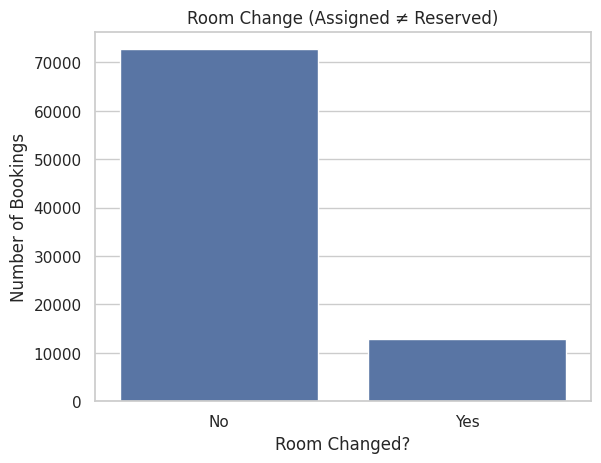

In [ ]:
# Visualization: Count of reassignments vs matches
sns.countplot(x='room_change', data=df)
plt.title("Room Change (Assigned ≠ Reserved)")
plt.xlabel("Room Changed?")
plt.ylabel("Number of Bookings")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

12) Are guests who make special requests more likely to experience booking changes or longer stays?
- Approach:

  - Group by special requests count, analyze booking_changes and total_stay

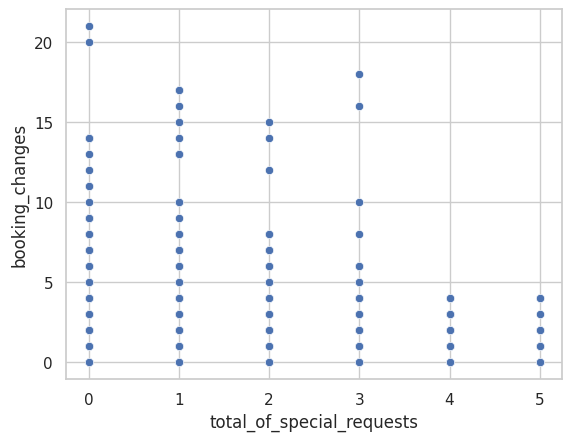

In [ ]:
sns.scatterplot(x='total_of_special_requests', y='booking_changes', data=df)
plt.show()

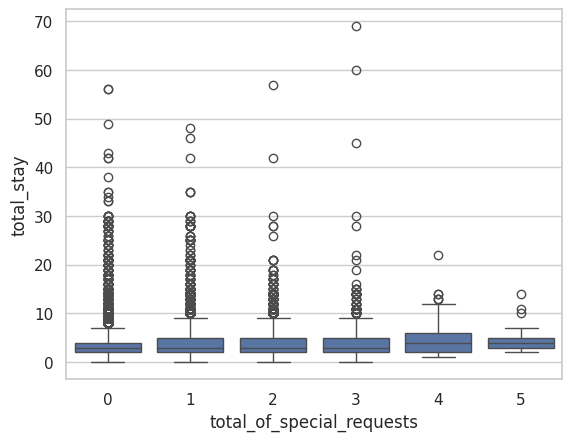

In [ ]:
sns.boxplot(x='total_of_special_requests', y='total_stay', data=df)
plt.show()

13) Do certain market segments or distribution channels show higher booking consistency or revenue?
- Approach:

  - Group by market_segment, distribution_channel to analyze ADR, cancellations, booking_changes

In [ ]:
segment_stats = df.groupby('market_segment').agg({
    'adr': 'mean',
    'is_canceled': 'mean',
    'booking_changes': 'mean'
}).reset_index()

print(segment_stats)

  market_segment         adr  is_canceled  booking_changes
0       Aviation  100.170396     0.198238         0.255507
1  Complementary    3.049315     0.125535         0.335235
2      Corporate   67.938952     0.120694         0.358042
3         Direct  112.517351     0.145051         0.402273
4         Groups   74.524346     0.258337         0.640507
5  Offline TA/TO   80.923205     0.145016         0.226703
6      Online TA  116.204676     0.351419         0.206794
7      Undefined   15.000000     1.000000         0.000000


<ipython-input-93-6c9c847577f8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = df.groupby('market_segment').agg({


14) What factors are most strongly associated with higher ADR?

In [ ]:
# Step 1: Correlation with numeric features
numeric_cols = df.select_dtypes(include='number')  # all numeric columns
correlation_with_adr = numeric_cols.corr()['adr'].sort_values(ascending=False)
print("Correlation of Numeric Features with ADR:\n")
print(correlation_with_adr)

Correlation of Numeric Features with ADR:

adr                               1.000000
group_size                        0.398391
total_guests                      0.398391
children                          0.303892
adults                            0.278365
arrival_date_year                 0.177071
total_of_special_requests         0.146707
is_canceled                       0.139095
arrival_date_week_number          0.103112
stay_duration                     0.054557
total_stay_nights                 0.054557
total_stay                        0.054557
stays_in_week_nights              0.054445
lead_time                         0.053422
stays_in_weekend_nights           0.037716
required_car_parking_spaces       0.028083
babies                            0.023142
arrival_date_day_of_month         0.018933
booking_changes                  -0.004676
agent                            -0.022535
days_in_waiting_list             -0.037344
previous_cancellations           -0.053834
previous_bo

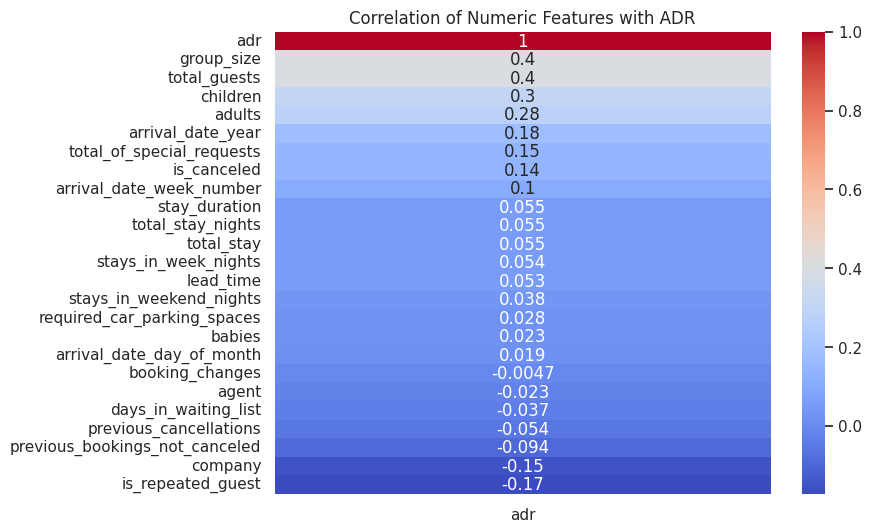

In [ ]:
# Visualize correlation
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr()[['adr']].sort_values(by='adr', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Numeric Features with ADR")
plt.show()

15) Are there customer types or segments consistently contributing to higher revenue?
- Approach:

  - Aggregate revenue (adr * total_stay) by customer_type or segment

In [ ]:
df['revenue'] = df['adr'] * df['total_stay']

revenue_by_customer = df.groupby('customer_type')['revenue'].sum().sort_values(ascending=False)
print(revenue_by_customer)

customer_type
Transient          28074176.09
Transient-Party     3249418.10
Contract            1582600.02
Group                131317.96
Name: revenue, dtype: float64


<ipython-input-96-84785a291af4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_customer = df.groupby('customer_type')['revenue'].sum().sort_values(ascending=False)


16) Do bookings with more lead time or from specific countries yield higher ADR?
- Approach:
  - Investigate correlation between lead_time and adr.

  - Compare ADR across top countries to find pricing differences.

Correlation: 0.053421578208976805


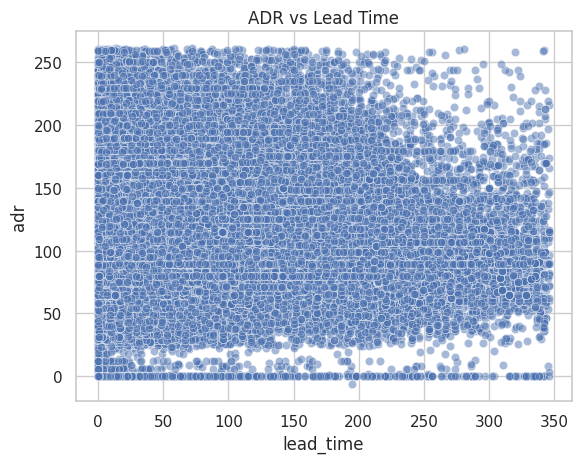

In [ ]:
# 1. Correlation between Lead Time and ADR
print("Correlation:", df['lead_time'].corr(df['adr']))

sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.5)
plt.title("ADR vs Lead Time")
plt.show()

17) Are guests with higher ADR more likely to request special services or make booking modifications?
- Approach:
  - Check correlation of adr with total_of_special_requests and booking_changes.

  - Use scatterplots to observe relationships.

In [ ]:
# Correlations
print("ADR vs Special Requests:", df['adr'].corr(df['total_of_special_requests']))
print("ADR vs Booking Changes:", df['adr'].corr(df['booking_changes']))

ADR vs Special Requests: 0.14670663758999075
ADR vs Booking Changes: -0.0046755556672933955


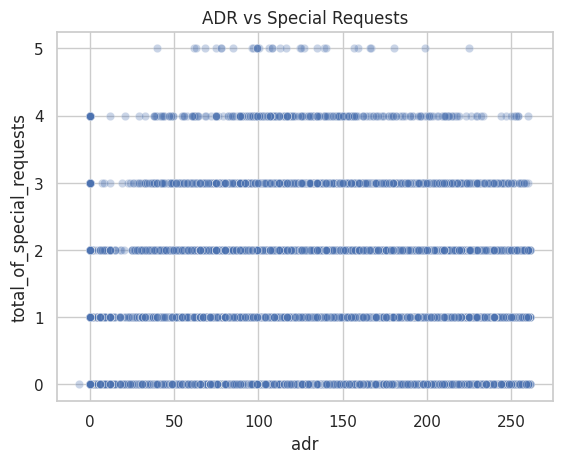

In [ ]:
# Visualizations
sns.scatterplot(x='adr', y='total_of_special_requests', data=df, alpha=0.3)
plt.title("ADR vs Special Requests")
plt.show()

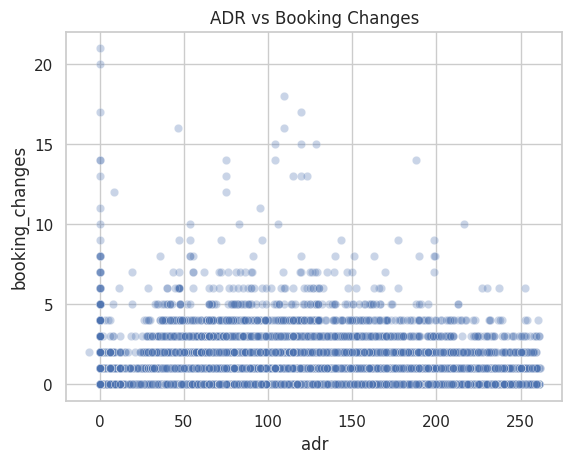

In [ ]:
sns.scatterplot(x='adr', y='booking_changes', data=df, alpha=0.3)
plt.title("ADR vs Booking Changes")
plt.show()

18) Do guests from different countries behave differently in terms of booking timing or stay length?
- Approach:
  - Calculate total_stay = stays_in_weekend_nights + stays_in_week_nights.

  - Compare lead_time and total_stay across top 10 countries.

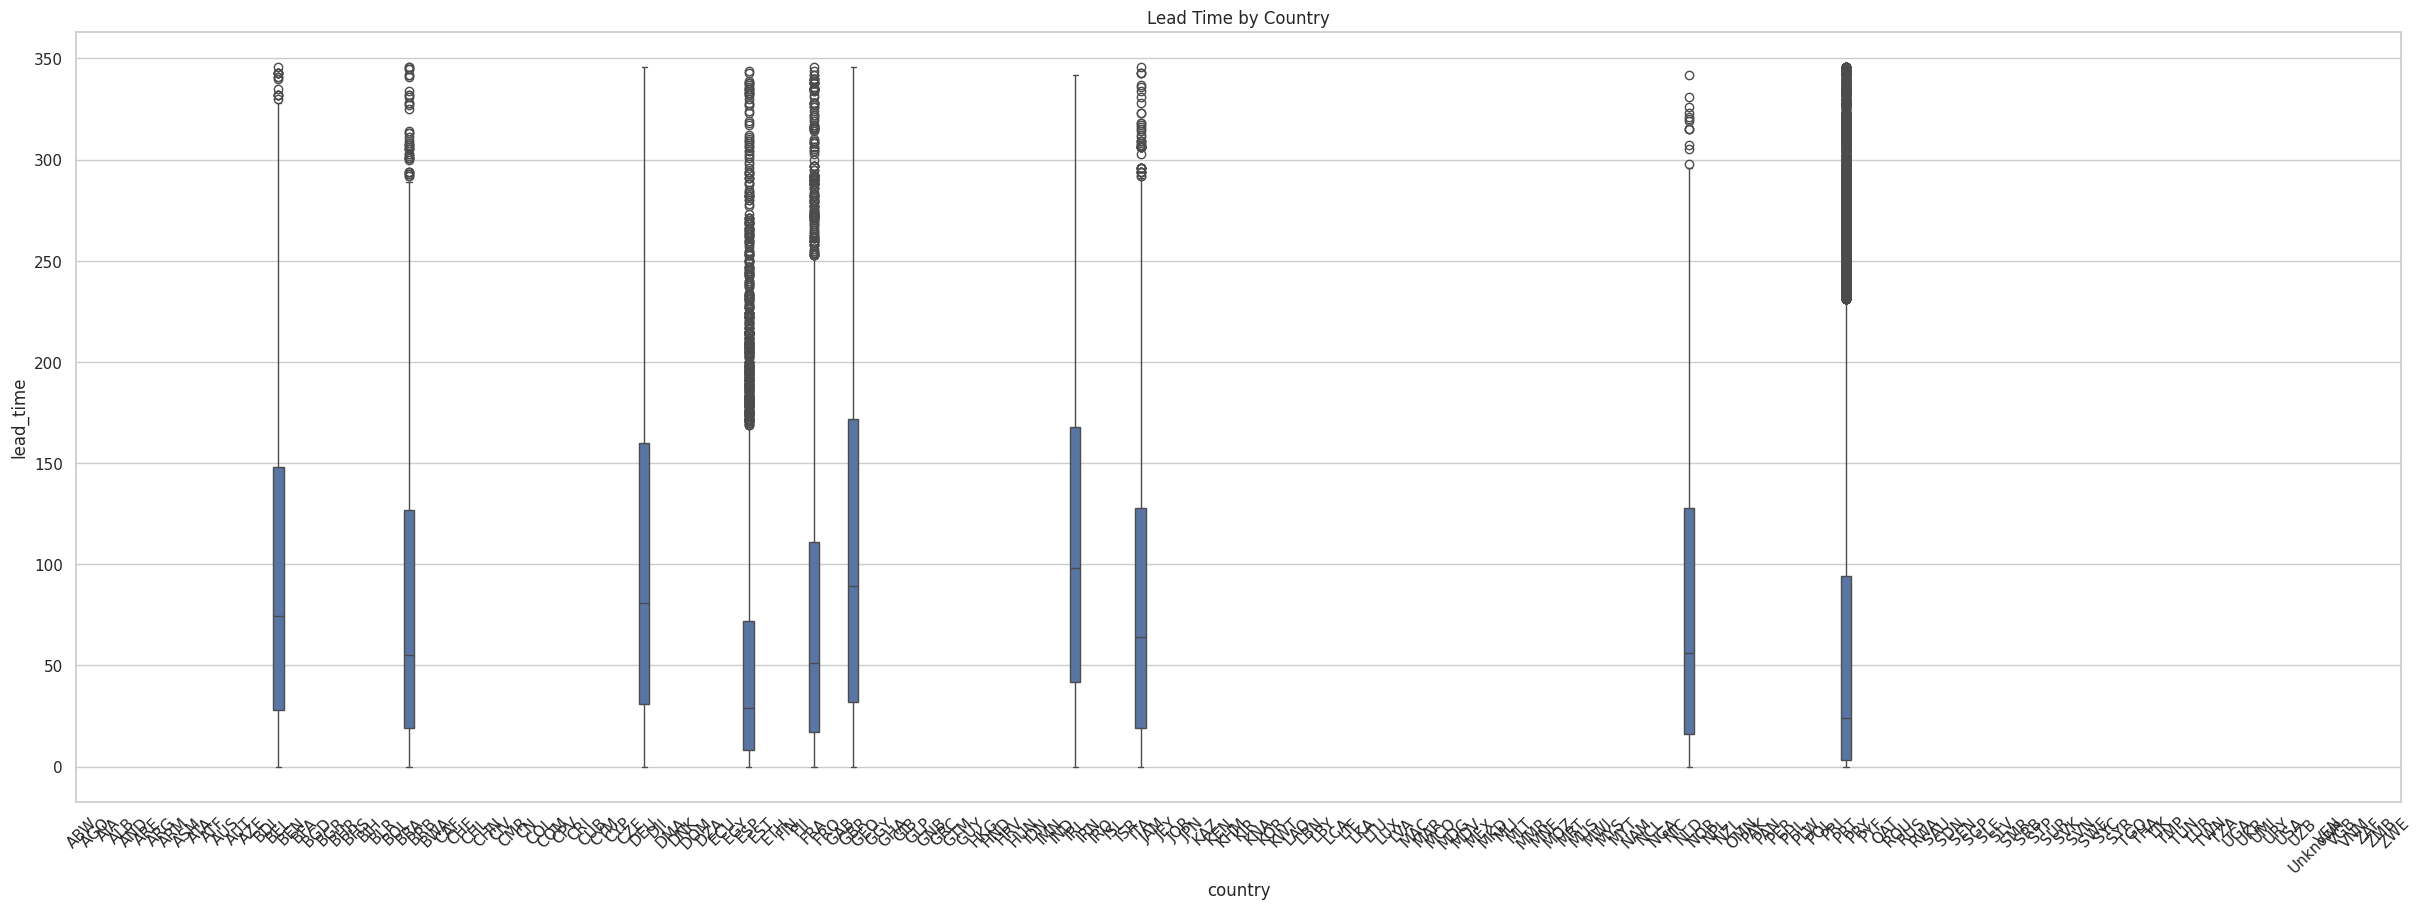

In [ ]:
# Create total stay column
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# Filter top countries
top_countries = df['country'].value_counts().head(10).index
filtered_df = df[df['country'].isin(top_countries)]
# Lead Time by Country
plt.figure(figsize=(30, 10))
sns.boxplot(x='country', y='lead_time', data=filtered_df)
plt.title("Lead Time by Country")
plt.xticks(rotation=45)
plt.show()

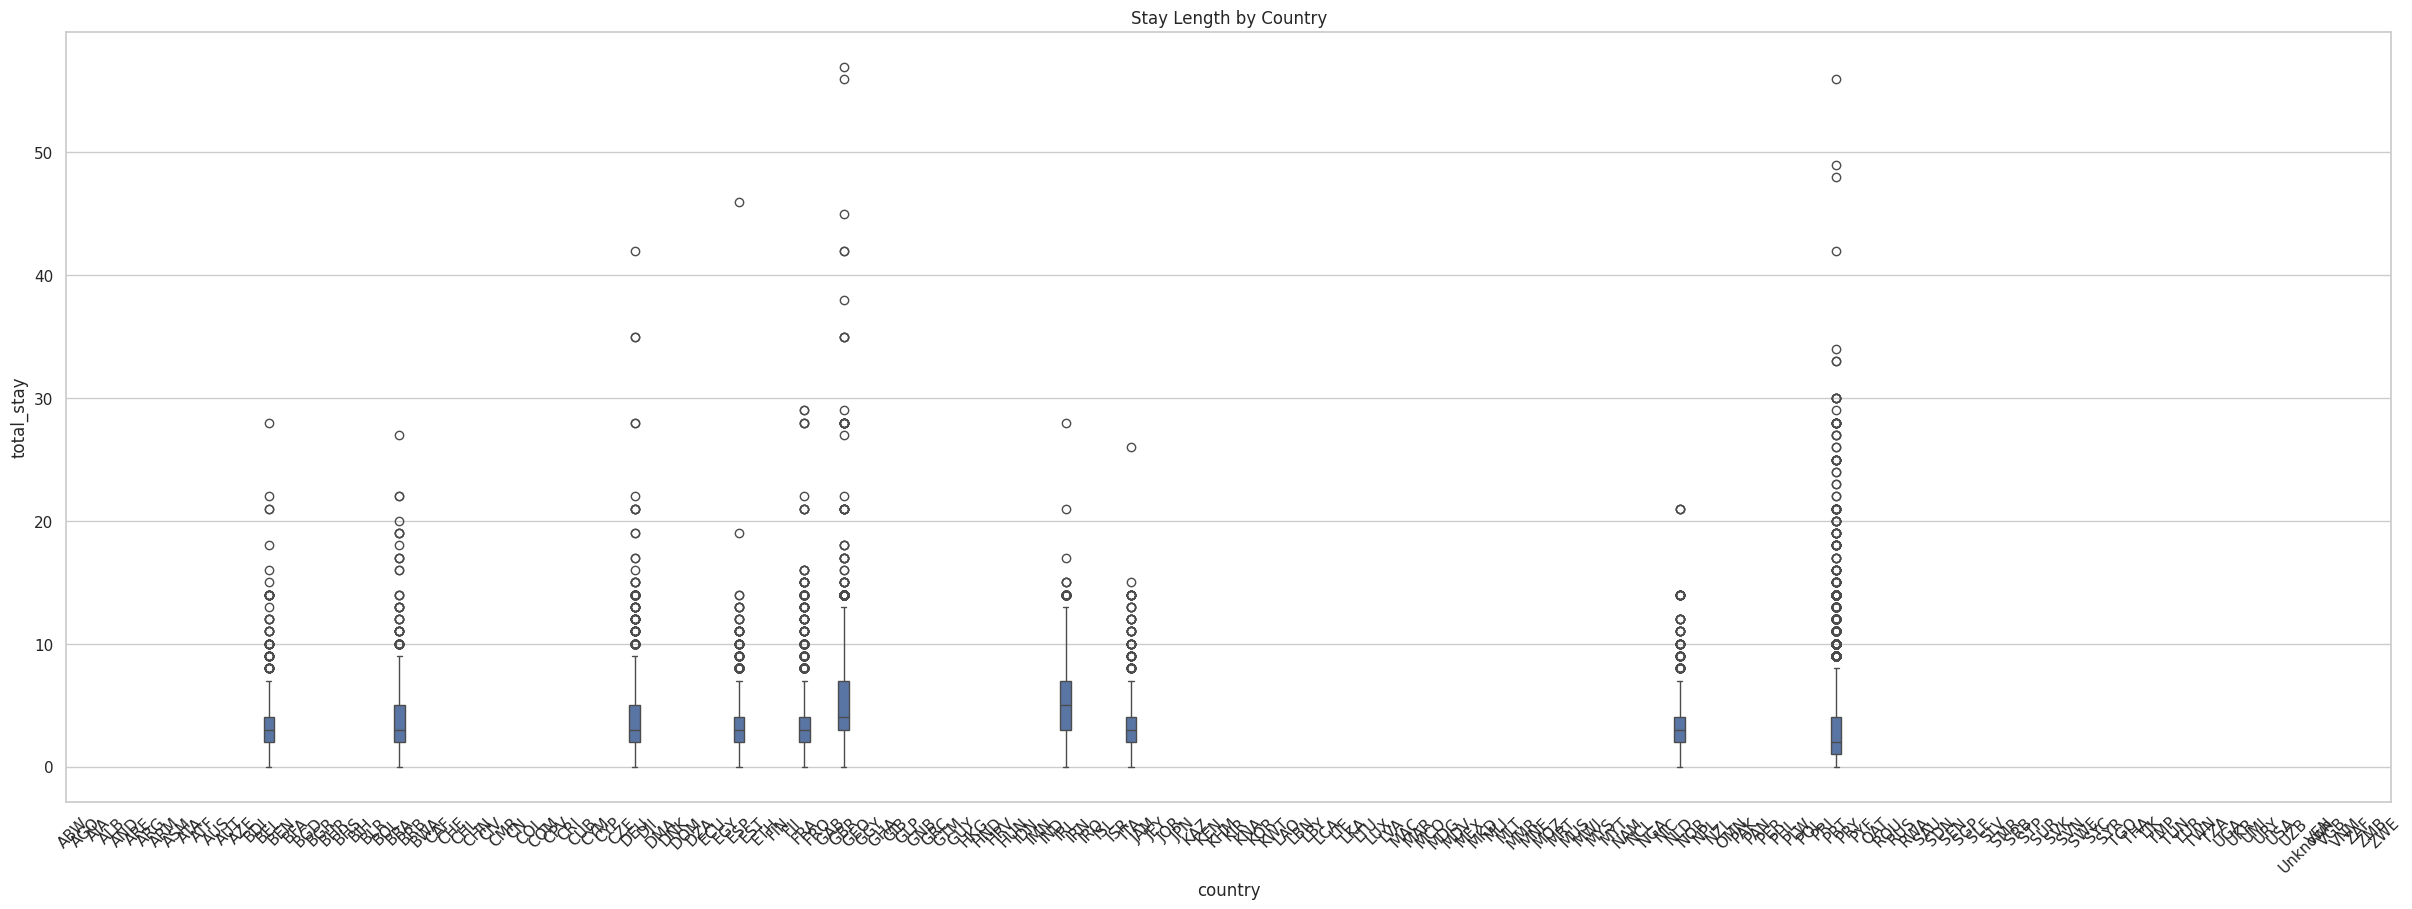

In [ ]:
# Stay Length by Country
plt.figure(figsize=(30, 10))
sns.boxplot(x='country', y='total_stay', data=filtered_df)
plt.title("Stay Length by Country")
plt.xticks(rotation=45)
plt.show()

19) ●	Are guests who make booking changes more likely to request additional services or cancel?
- Approach:
  - Correlation between booking_changes and total_of_special_requests.

  - Compare booking changes for is_canceled = 0 vs 1.

In [ ]:
# Correlations
print("Changes vs Special Requests:", df['booking_changes'].corr(df['total_of_special_requests']))

Changes vs Special Requests: 0.01361401579998582


In [ ]:
# Mean booking changes for canceled vs not canceled
print(df.groupby('is_canceled')['booking_changes'].mean())

is_canceled
0    0.307929
1    0.160069
Name: booking_changes, dtype: float64


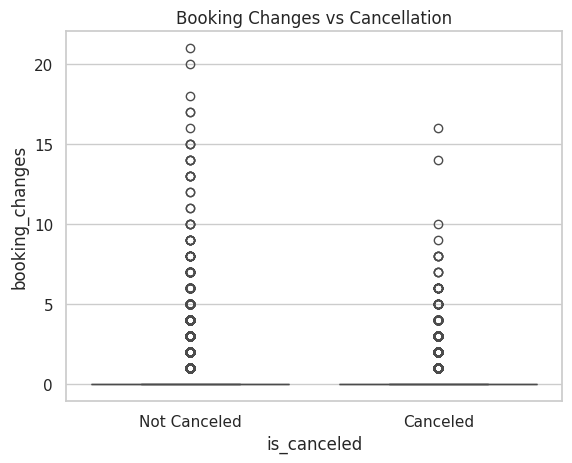

In [ ]:
# Visualizations
sns.boxplot(x='is_canceled', y='booking_changes', data=df)
plt.title("Booking Changes vs Cancellation")
plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.show()

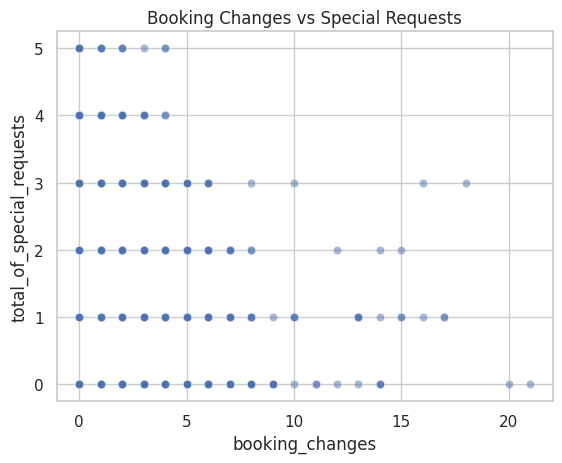

In [ ]:
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df, alpha=0.5)
plt.title("Booking Changes vs Special Requests")
plt.show()

In [ ]:
df.shape

(85653, 42)